<a href="https://colab.research.google.com/github/pioneer123456/PPG-anlaysis-From-smartphone-images-Using-AI/blob/main/creating_database_for_PPG_and__building_AI_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### COLLECTING DATA AND USING AI TO DETECT BPM


In [ ]:
#importing library to get heartbeat
!pip install heartpy 
import heartpy as hp

In [ ]:
#importing other important libraries
import cv2 
from google.colab.patches import cv2_imshow
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np

# Making a database

In [ ]:
#mounting g-drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Opens the Video file
for j in range(1,17):
  cap= cv2.VideoCapture('/content/drive/MyDrive/ssvid'+str(j)+'.mp4')
  i=0
  while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('kang'+str(i)+'.jpg',frame)
    i+=1
 
  cap.release()
  cv2.destroyAllWindows()

  b=[] #getting R_mean for second video

  for i in range(0,900):
    image = cv2.imread('/content/kang'+str(i)+'.jpg')
    (B, G, R) = cv2.split(image)
    b.append(R.mean())
#enhancing the peaks
  enhanced1 = hp.enhance_peaks(b, iterations=2)
  #filtered1 = hp.filter_signal(enhanced1,cutoff=5,sample_rate=100,order=3)
  
  
# creating the DataFrame
  print(j)
  
  if j==1:
    df = pd.DataFrame()
    df = pd.DataFrame(np.reshape(enhanced1, (1,len(enhanced1))))
  if j>1:  
    df.loc[len(df.index)] = enhanced1
# saving the DataFrame as a CSV file
gfg_csv_data = df.to_csv('GfG.csv')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [ ]:
 df
 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,BPM
0,281.903020,287.949389,291.580679,318.404991,324.968783,327.002384,323.864330,327.292187,327.934625,333.816636,334.058079,335.926848,333.182176,328.217503,336.518860,336.669157,333.644761,334.300076,337.462163,347.432873,346.239673,349.582166,347.963284,357.556538,352.047269,361.820648,356.156765,365.028066,374.869210,377.703927,418.218548,402.286902,390.893472,391.200623,399.575827,404.025749,409.398314,418.100937,424.174847,422.606735,...,566.555047,580.609834,589.557320,611.767074,603.042942,473.702352,257.625788,153.384159,131.711829,122.706971,121.544849,148.474203,224.161703,273.464635,327.906160,371.290881,412.623523,454.014370,495.310665,499.785692,501.733631,504.323992,536.858197,529.119146,513.006124,322.278845,144.695758,87.544718,73.319262,75.133369,88.379175,149.163101,230.977017,325.034134,382.399425,425.528533,469.998237,518.625882,524.562300,93.75
1,175.871768,194.644428,214.305742,270.219129,255.565111,233.234845,219.620078,195.540061,206.117798,220.462406,240.807549,264.234925,248.225351,248.987593,241.997660,255.820677,274.558313,286.287200,302.627283,330.494155,316.766139,326.271802,332.164676,339.514340,309.481530,281.109948,258.931904,226.106868,210.304023,184.756470,192.673032,154.523597,142.551168,137.627009,123.029056,125.201600,120.883267,118.775928,108.054743,93.365538,...,419.885194,426.155438,414.120200,362.405920,312.693099,318.594002,301.744740,249.916976,223.319558,234.292901,224.669113,211.448151,200.899488,205.305308,204.968555,209.689318,218.691564,223.055996,225.105748,228.415527,242.378260,240.667941,266.811615,266.238761,242.625273,187.191442,170.832113,160.908931,152.474587,141.819274,127.282368,124.425689,122.786227,121.334330,128.863594,129.930423,124.407092,146.828336,168.288487,88.52
2,728.125532,745.083147,751.619204,760.782455,780.885960,800.929677,832.326676,870.646250,873.654968,868.057713,841.070970,775.311106,736.736676,730.960881,738.522139,748.002946,768.657012,792.219343,820.500172,842.829082,829.496878,809.919696,807.399722,803.074793,797.351099,801.026163,798.230232,808.473174,790.734583,725.855891,706.025521,709.576937,706.839366,716.928638,719.609092,726.073045,725.816140,721.252161,732.431273,744.471716,...,985.723192,1004.615803,1014.905603,1024.000000,693.000728,656.025014,593.646534,572.202308,574.246964,575.986674,596.359368,617.950363,625.731168,624.322821,634.212740,646.353627,647.917134,659.086789,670.986033,681.307783,690.091114,691.185787,641.382528,596.114682,586.034446,572.777934,580.075994,605.882708,608.353672,611.159643,619.178113,617.391132,616.026864,619.896712,631.876495,640.424507,644.277727,620.959235,558.373984,111.43
3,261.708703,278.302330,278.646933,278.473112,279.895930,294.513261,321.858776,339.478921,373.655580,402.709474,436.883586,468.618577,492.865758,525.857124,535.418106,476.712874,352.485234,273.627405,249.712474,256.659292,277.682309,299.421380,310.531039,317.537747,316.749179,312.845001,314.218258,309.484888,309.047568,312.651343,321.189969,324.674650,328.476355,333.272675,340.044574,311.693489,215.721811,123.430150,77.032039,61.785535,...,465.671445,494.967477,526.215707,542.926686,559.038372,577.694950,607.750265,640.663408,671.782187,697.626185,730.803729,478.785505,507.972603,554.053057,580.239539,541.141775,487.505665,458.108218,455.526224,466.116864,479.173020,501.743503,522.220613,543.725184,545.988321,555.116151,575.185083,588.820887,614.063125,638.724966,657.444210,667.684844,691.654724,717.803025,762.548032,799.777709,1024.000000,991.075456,902.346213,85.19
4,640.140314,634.947497,635.995943,612.894997,446.811098,199.816833,142.148636,128.939758,144.634442,162.951584,146.175525,163.143215,144.220554,129.559529,120.315579,113.718358,118.737862,124.872351,141

In [ ]:
 filtered1

In [ ]:
#analysing using heartpy

fs = 30.0
working_data, measures = hp.process(enhanced1, fs, report_time=True)
print('breathing rate is: %s Hz' %measures['breathingrate'])


Finished in 0.018816 sec
breathing rate is: 0.24137098720733766 Hz


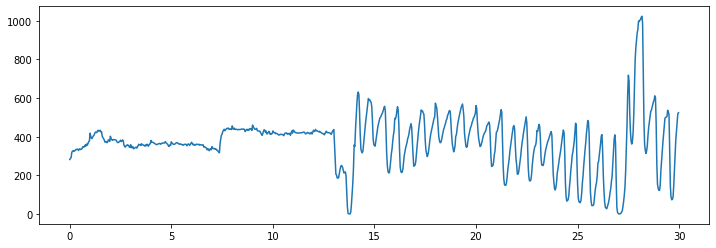

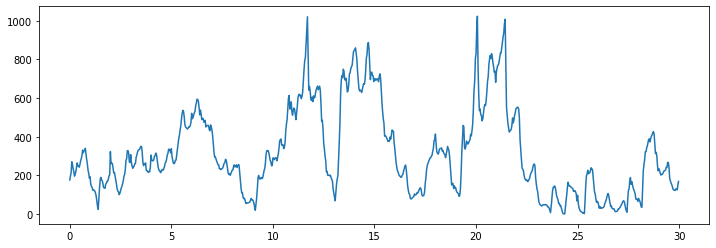

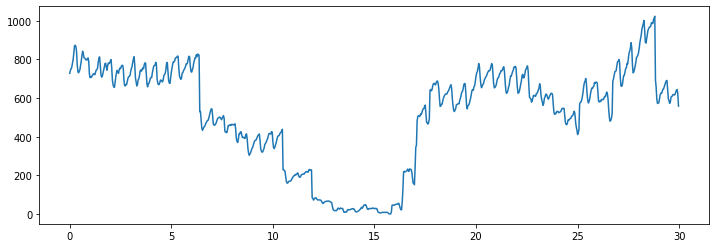

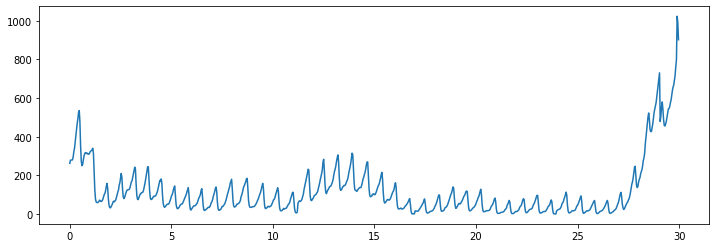

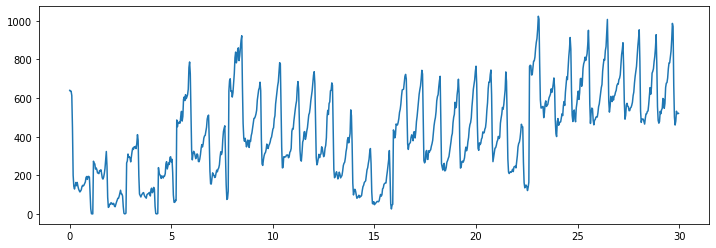

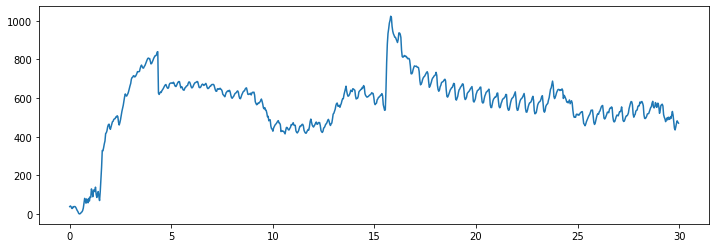

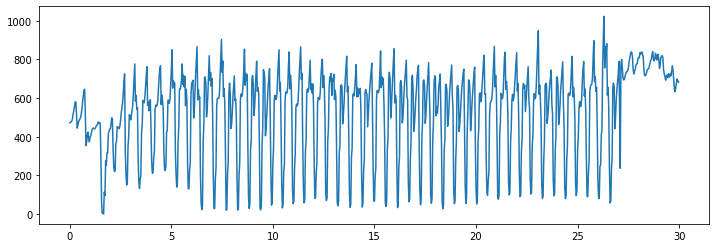

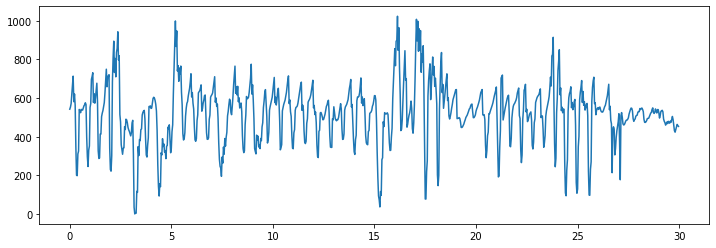

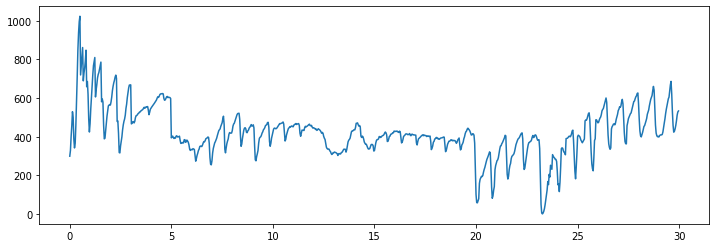

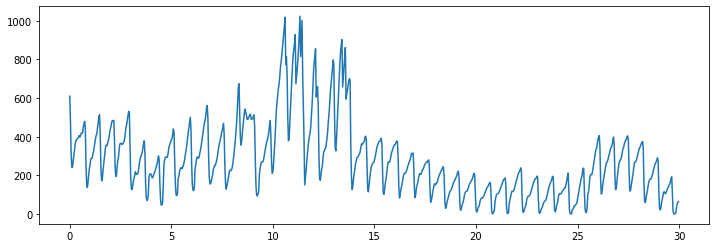

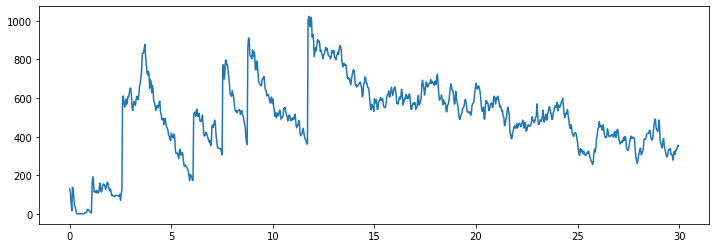

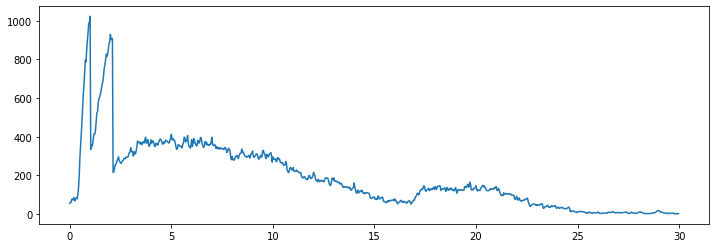

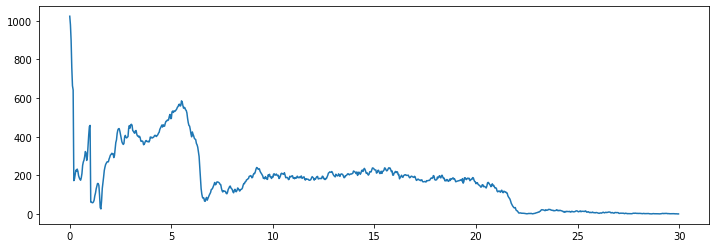

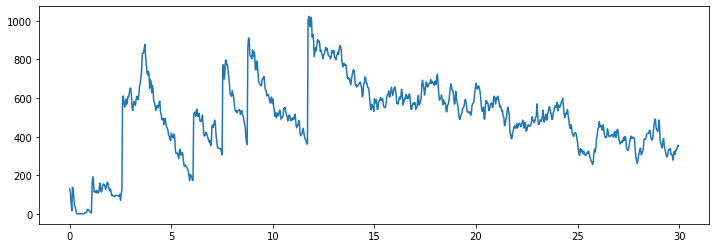

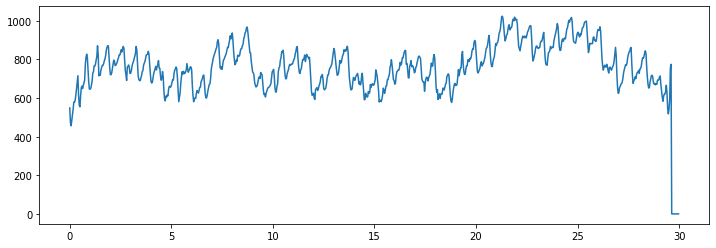

In [ ]:
#generarting time frame values for corresponding frames
def getnums(s, e,i):
   return (np.arange(s, e,i))

# Driver Code
start, end, intval = 0, 30,1/30  #we have 30 frames per sec for 30 sec 
y=getnums(start, end,intval)
#Printing various input signals
for i in range(15):
  plt.figure(figsize=(12,4))
  plt.plot(y,df.loc[i])
  plt.show()

In [ ]:
for measure in measures.keys():
    print('%s: %f' %(measure, measures[measure]))


bpm: 80.597015
ibi: 744.444444
sdnn: 56.655772
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 33.333333
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Warning: converting a masked element to nan.
  


<Figure size 864x288 with 0 Axes>

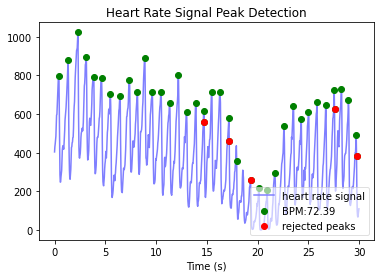

In [ ]:
 #plot
plt.figure(figsize=(12,4))
hp.plotter(working_data, measures)


Finished in 0.038972 sec

Finished in 0.032593 sec

Finished in 0.025287 sec

Finished in 0.039469 sec


/usr/local/lib/python3.7/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)



Finished in 0.051591 sec

Finished in 0.021157 sec

Finished in 0.051741 sec

Finished in 0.042310 sec

Finished in 0.025783 sec

Finished in 0.038128 sec

Finished in 0.028300 sec

Finished in 0.026411 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/heartpy/visualizeutils.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t


Finished in 0.030554 sec

Finished in 0.029111 sec

Finished in 0.032358 sec

Finished in 0.042530 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/heartpy/visualizeutils.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

<Figure size 864x288 with 0 Axes>

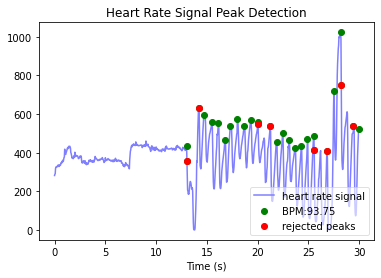

<Figure size 864x288 with 0 Axes>

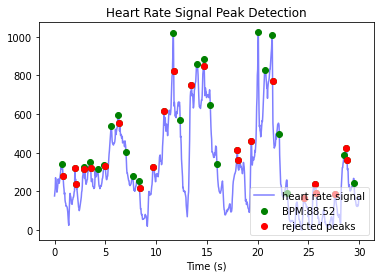

<Figure size 864x288 with 0 Axes>

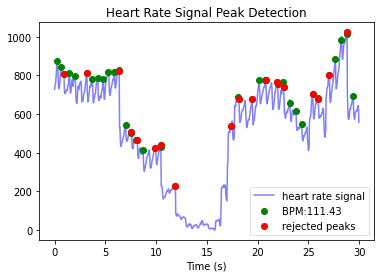

<Figure size 864x288 with 0 Axes>

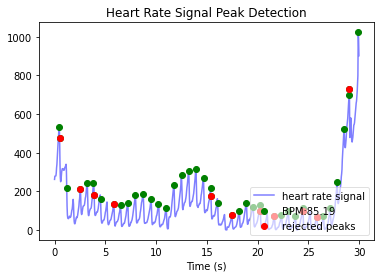

<Figure size 864x288 with 0 Axes>

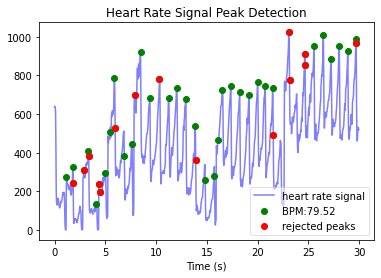

<Figure size 864x288 with 0 Axes>

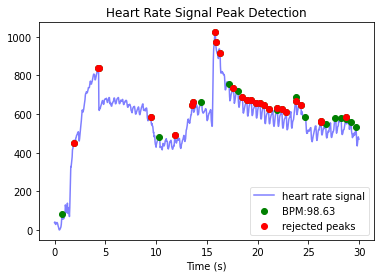

<Figure size 864x288 with 0 Axes>

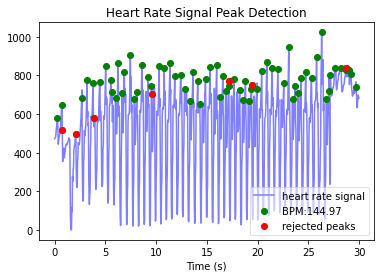

<Figure size 864x288 with 0 Axes>

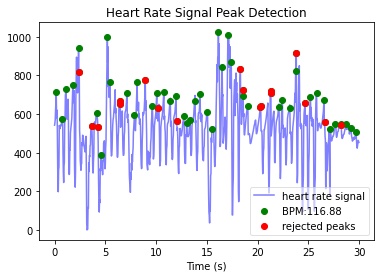

<Figure size 864x288 with 0 Axes>

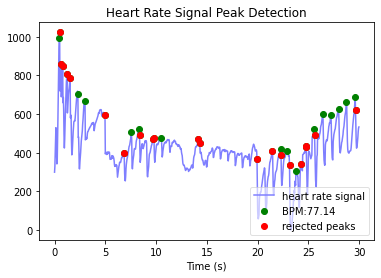

<Figure size 864x288 with 0 Axes>

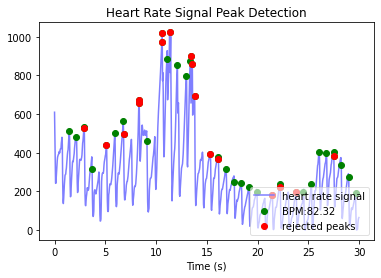

<Figure size 864x288 with 0 Axes>

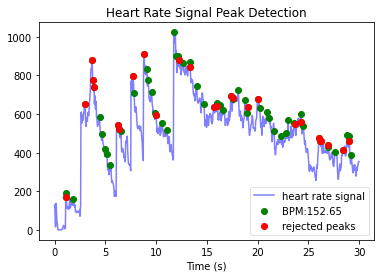

<Figure size 864x288 with 0 Axes>

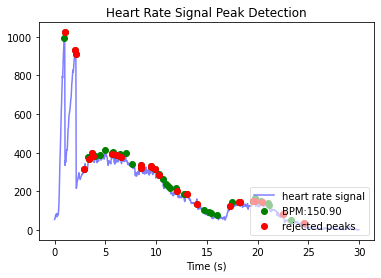

<Figure size 864x288 with 0 Axes>

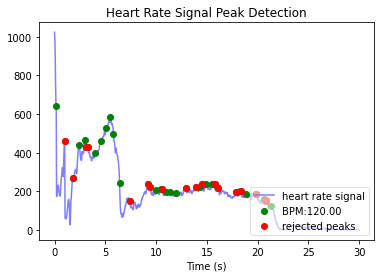

<Figure size 864x288 with 0 Axes>

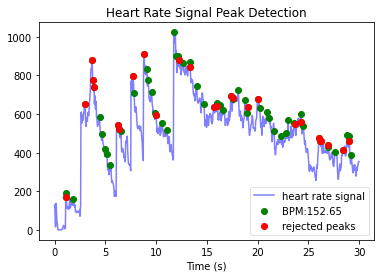

<Figure size 864x288 with 0 Axes>

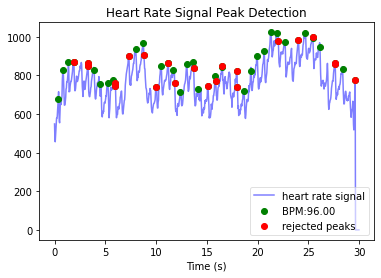

<Figure size 864x288 with 0 Axes>

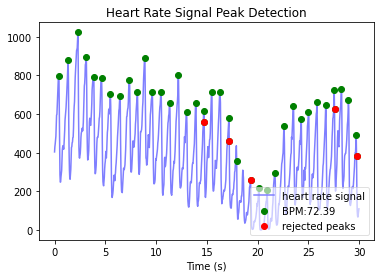

In [ ]:
#Processing all video frames to get bpm
for i in range(16
               ):
 working_data, measures = hp.process(df.loc[i], fs, report_time=True)
 plt.figure(figsize=(12,4))
 hp.plotter(working_data, measures)

In [ ]:
# adding BPM coulmn to the dataframe
df["BPM"]=[93.75,88.52,111.43,85.19,79.52,98.63,144.97,116.88,77.14,82.32,152.65,150.90,120,152.65,96,72]

In [ ]:
#expoting the data to csv file
gfg_csv_data = df.to_csv('GfG.csv')

## Building Deep learning Model to detect

In [ ]:
# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise

In [ ]:

# In read_csv() function, we have passed the location to where the file is located at dphi official github page
PPG_data = df

In [ ]:

PPG_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,BPM
0,281.903020,287.949389,291.580679,318.404991,324.968783,327.002384,323.864330,327.292187,327.934625,333.816636,334.058079,335.926848,333.182176,328.217503,336.518860,336.669157,333.644761,334.300076,337.462163,347.432873,346.239673,349.582166,347.963284,357.556538,352.047269,361.820648,356.156765,365.028066,374.869210,377.703927,418.218548,402.286902,390.893472,391.200623,399.575827,404.025749,409.398314,418.100937,424.174847,422.606735,...,566.555047,580.609834,589.557320,611.767074,603.042942,473.702352,257.625788,153.384159,131.711829,122.706971,121.544849,148.474203,224.161703,273.464635,327.906160,371.290881,412.623523,454.014370,495.310665,499.785692,501.733631,504.323992,536.858197,529.119146,513.006124,322.278845,144.695758,87.544718,73.319262,75.133369,88.379175,149.163101,230.977017,325.034134,382.399425,425.528533,469.998237,518.625882,524.562300,93.75
1,175.871768,194.644428,214.305742,270.219129,255.565111,233.234845,219.620078,195.540061,206.117798,220.462406,240.807549,264.234925,248.225351,248.987593,241.997660,255.820677,274.558313,286.287200,302.627283,330.494155,316.766139,326.271802,332.164676,339.514340,309.481530,281.109948,258.931904,226.106868,210.304023,184.756470,192.673032,154.523597,142.551168,137.627009,123.029056,125.201600,120.883267,118.775928,108.054743,93.365538,...,419.885194,426.155438,414.120200,362.405920,312.693099,318.594002,301.744740,249.916976,223.319558,234.292901,224.669113,211.448151,200.899488,205.305308,204.968555,209.689318,218.691564,223.055996,225.105748,228.415527,242.378260,240.667941,266.811615,266.238761,242.625273,187.191442,170.832113,160.908931,152.474587,141.819274,127.282368,124.425689,122.786227,121.334330,128.863594,129.930423,124.407092,146.828336,168.288487,88.52
2,728.125532,745.083147,751.619204,760.782455,780.885960,800.929677,832.326676,870.646250,873.654968,868.057713,841.070970,775.311106,736.736676,730.960881,738.522139,748.002946,768.657012,792.219343,820.500172,842.829082,829.496878,809.919696,807.399722,803.074793,797.351099,801.026163,798.230232,808.473174,790.734583,725.855891,706.025521,709.576937,706.839366,716.928638,719.609092,726.073045,725.816140,721.252161,732.431273,744.471716,...,985.723192,1004.615803,1014.905603,1024.000000,693.000728,656.025014,593.646534,572.202308,574.246964,575.986674,596.359368,617.950363,625.731168,624.322821,634.212740,646.353627,647.917134,659.086789,670.986033,681.307783,690.091114,691.185787,641.382528,596.114682,586.034446,572.777934,580.075994,605.882708,608.353672,611.159643,619.178113,617.391132,616.026864,619.896712,631.876495,640.424507,644.277727,620.959235,558.373984,111.43
3,261.708703,278.302330,278.646933,278.473112,279.895930,294.513261,321.858776,339.478921,373.655580,402.709474,436.883586,468.618577,492.865758,525.857124,535.418106,476.712874,352.485234,273.627405,249.712474,256.659292,277.682309,299.421380,310.531039,317.537747,316.749179,312.845001,314.218258,309.484888,309.047568,312.651343,321.189969,324.674650,328.476355,333.272675,340.044574,311.693489,215.721811,123.430150,77.032039,61.785535,...,465.671445,494.967477,526.215707,542.926686,559.038372,577.694950,607.750265,640.663408,671.782187,697.626185,730.803729,478.785505,507.972603,554.053057,580.239539,541.141775,487.505665,458.108218,455.526224,466.116864,479.173020,501.743503,522.220613,543.725184,545.988321,555.116151,575.185083,588.820887,614.063125,638.724966,657.444210,667.684844,691.654724,717.803025,762.548032,799.777709,1024.000000,991.075456,902.346213,85.19
4,640.140314,634.947497,635.995943,612.894997,446.811098,199.816833,142.148636,128.939758,144.634442,162.951584,146.175525,163.143215,144.220554,129.559529,120.315579,113.718358,118.737862,124.872351,141

In [ ]:
PPG_data=PPG_data[0:]

In [ ]:
X = boston_data.drop('BPM', axis = 1)    # Input Variables/features
y = boston_data.BPM      # output variables/features

In [ ]:
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.
 
# test_size = 0.20: 20% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the cod

In [ ]:
# find the number of input features
n_features = X.shape[1]
print(n_features)

900


In [ ]:
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
import tensorflow

In [ ]:
# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
# import RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)    # 0.01 is the learning rate

In [ ]:
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model

In [ ]:
seed_value = 42
seed(seed_value)        # If you build the model with given parameters, set_random_seed will help you produce the same result on multiple execution


# Recommended by Keras -------------------------------------------------------------------------------------
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# Recommended by Keras -------------------------------------------------------------------------------------


# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tensorflow.random.set_seed(seed_value) 
model.fit(X_train, y_train, epochs=10, batch_size=30, verbose = 1)    # fit the model

In [ ]:
print(model.evaluate(X_test, y_test))

1/1 [==============================] - 0s 122ms/step - loss: 8875.2100
8875.2099609375


In [ ]:
# play with batch size
learning_rate = 0.1        
epochs = 1500         
batch = 1    # Replace ? with an integer    
optimizer = RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch)     # fit the model
model.evaluate(X_test, y_test)       # Evaluate the model

In [ ]:
model.predict(np.reshape(enhanced1, (1,len(enhanced1))))

array([[112.0784]], dtype=float32)

In [ ]:
np.reshape(enhanced1, (1,len(enhanced1)))

## Using ML model

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
# Importing RandomForestClassifier from sklearn.ensemble
# We will be further discussing about why Random Forest is in ensemble module of sklearn library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Make predictions on test data
predictions = rfc.predict(X_test)
# Performance metrics
errors = abs(predictions - y_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 26.89 degrees.
Accuracy: 71.73 %.


In [ ]:
predictions = rfc.predict(np.reshape(enhanced1, (1,len(enhanced1))))

In [ ]:
predictions

array([99.7701])

## Testing other models

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    #linear_model.ARDRegression(),
]

trainingData    = X_train
trainingScores  = y_train
predictionData  = X_test

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    #print(clf.predict(predictionData),'\n')
    # Make predictions on test data
    predictions = clf.predict(X_test)
    # Performance metrics
    errors = abs(predictions - y_test)
    print('Metrics for Random Forest Trained on Expanded Data')
    print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Metrics for Random Forest Trained on Expanded Data
Average absolute error: 28.99 degrees.
Accuracy: 71.93 %.
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Metrics for Random Forest Trained on Expanded Data
Average absolute error: 2.1190911292028326e+17 degrees.
Accuracy: -2.252180118377194e+17 %.
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=3